## Summary

In [ ]:
''' 
############################################################################
# Title:  Sales Marketing System To Target Customers
############################################################################

# Key Indicators
As per the different algorithms and models used the key indicators that were found to be most signifcant in deciding the 
CD purchases are:
1. Number of employees
2. Euribor 3 month rate
3. No. of days passed after the client was last contacted from previous campaign
4. Consumer Confidence Index
5. Employment variation rate
6. Success of previous campaign

# Findings
1. Adults in the age group 20-60 are contacted more while the conversion rate is significantly higher for younger 
   and older age groups.
2. Occupations admin., blue-collar and technician are contacted more but students and retired people show a 
   higher interest in CD purchase.
3. High school and university graduates show more interest in purchasing CD.
4. Singles have a higher purchasing rate than people who have been married atleast once.
5. Considerable number of people were contacted via both cells and telephones. Cellular contacts shows higher conversions. 
   This might have happened because the cellular calls would have been received directly by the decision makers. 
   Telephonic calls, on the other hand, might have been received by answering machines or assistants/maids and not the 
   decision makers. Hence, were not converted.
6. Insterested people usually make a purchase within first three calls.
7. Customers show a higher tendency of purchase in December but not many were approached. However, a lot of cutomers were 
   contacted in the month of May but May shows the lowest conversion rate.

# Models
Four models were developed for classification and prediction.
1. Logistic Regression
   AUC: 0.737        Accuracy: 0.797
2. Gradient Boosting Regressor
   AUC: 0.754        Accuracy: 0.823
3. Random Forest
   AUC: 0.603        Accuracy: 0.898
4. Support Vector Machines
   AUC: 0.704        Accuracy: 0.863 
Random Forest gives the highest accuracy but Gradient Boosting proves to be the best model with higest AUC.

PFB the codes and graphs used for analysis.

'''

## Libraries and Functions

In [3]:
## Importing Packages
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_rows = 100
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import linear_model
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [4]:
# Confusion Matrix Function
def plot_confusion_matrix(cm, classes,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt ='d'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Exploratory Data Analysis

In [6]:
data=pd.read_csv('bank.csv',sep=';')
data.shape

(41188, 21)

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [254]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [7]:
# Changing output to binary
data['y']=np.where(data['y']=='yes',1,0)

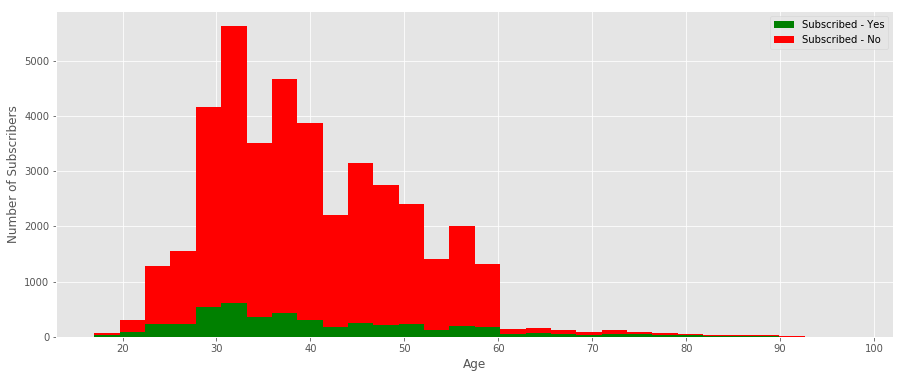

In [419]:
# Age and Subscribers
figure = plt.figure(figsize=(15,6))
plt.hist([data[data['y']==1]['age'], data[data['y']==0]['age']], stacked=True, color = ['g','r'],
         bins = 30,label = ['Subscribed - Yes','Subscribed - No'])
plt.xlabel('Age')
plt.ylabel('Number of Subscribers')
plt.legend()

#### Adults in age group 20-60 have been targetted with priority.

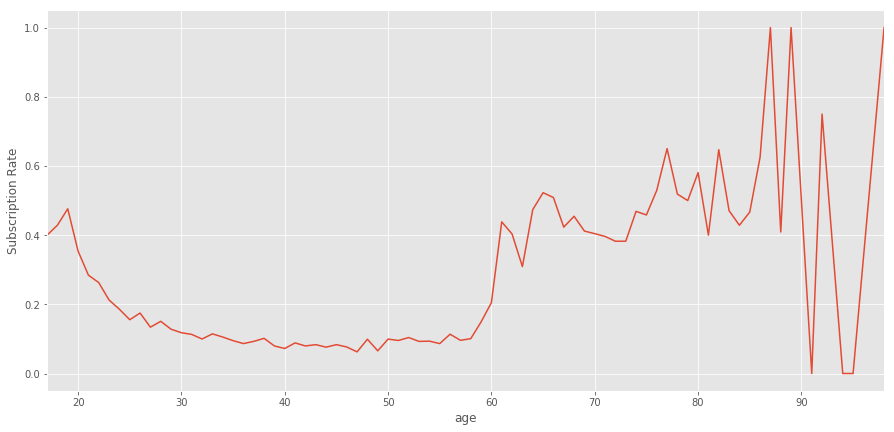

In [740]:
# Subscription Rate and age
ax = plt.subplot()
ax.set_ylabel('Subscription Rate')
data.groupby('age').mean()['y'].plot(kind='line',figsize=(15,7), ax = ax)

##### Older and younger age groups have higher conversion rate. Adult in age group 20-60 might have tendency to invest money and are less interested in CD.

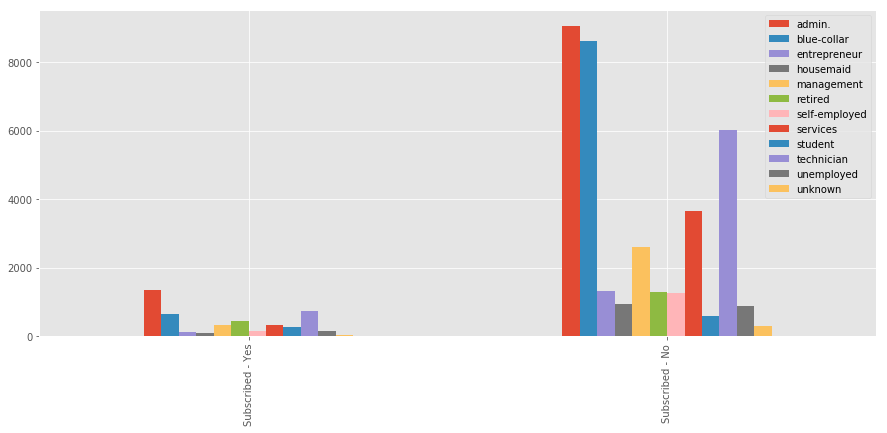

In [401]:
# Job and subscription
subscribed_job = data[data['y']==1]['job'].value_counts()
not_subscribed_job = data[data['y']==0]['job'].value_counts()
df = pd.DataFrame([subscribed_job,not_subscribed_job])
df.index = ['Subscribed - Yes','Subscribed - No']
df.plot(kind='bar', figsize=(15,6))

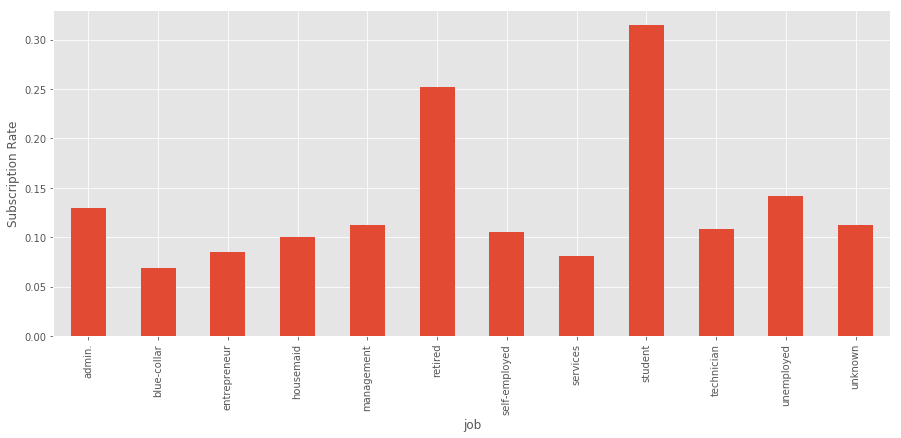

In [402]:
# Subscription Rate and Job
ax = plt.subplot()
ax.set_ylabel('Subscription Rate')
data.groupby('job').mean()['y'].plot(kind='bar',figsize=(15,6), ax = ax)

##### Occupations admin., blue-collar and technician are highly targetted but students and retired people show a higher interest in CD purchase.

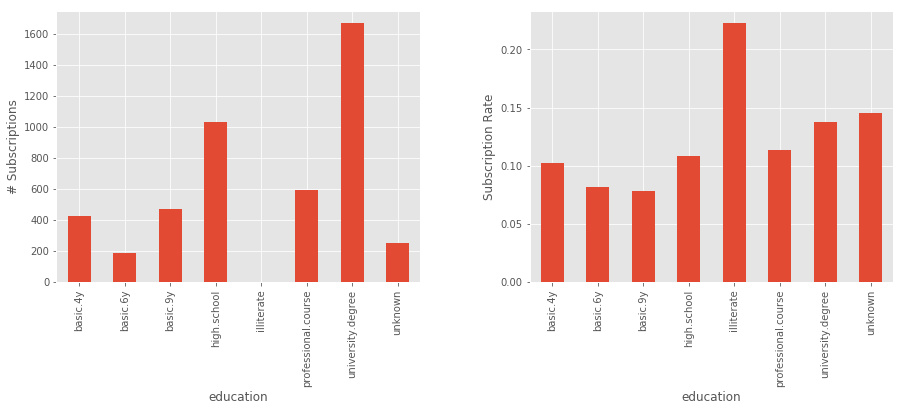

In [394]:
grid=plt.GridSpec(1,2,wspace=0.3)
fig=plt.figure(figsize=(6,5))

# Education and Subscriptions
ax = plt.subplot(grid[0,0])
ax.set_ylabel('# Subscriptions')
data.groupby('education').sum()['y'].plot(kind='bar',figsize=(15,5), ax = ax)

# Education and Subscription rate
ax = plt.subplot(grid[0,1])
ax.set_ylabel('Subscription Rate')
data.groupby('education').mean()['y'].plot(kind='bar',figsize=(15,5), ax = ax)

##### High school and university graduates show good intertest in CDs.

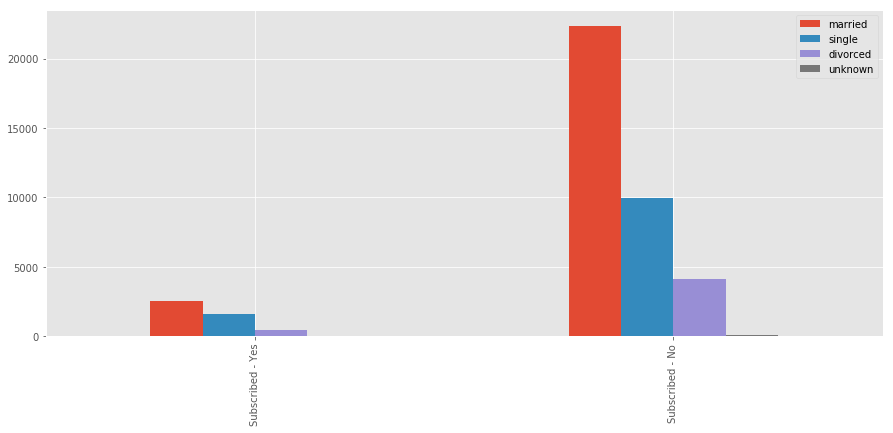

In [403]:
# Marriage and Subscription
subscribed_marital = data[data['y']==1]['marital'].value_counts()
not_subscribed_marital = data[data['y']==0]['marital'].value_counts()
df = pd.DataFrame([subscribed_marital,not_subscribed_marital])
df.index = ['Subscribed - Yes','Subscribed - No']
df.plot(kind='bar', figsize=(15,6))

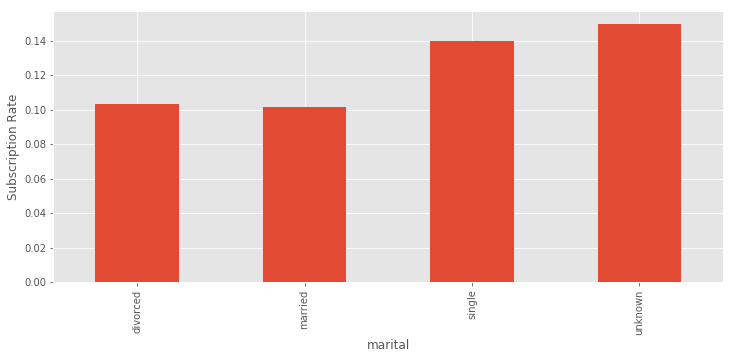

In [420]:
# Subscription Rate and Marital Status
ax = plt.subplot()
ax.set_ylabel('Subscription Rate')
data.groupby('marital').mean()['y'].plot(kind='bar',figsize=(12,5), ax = ax)

##### Singles have a higher purchase rate than people who have been married atleast once.

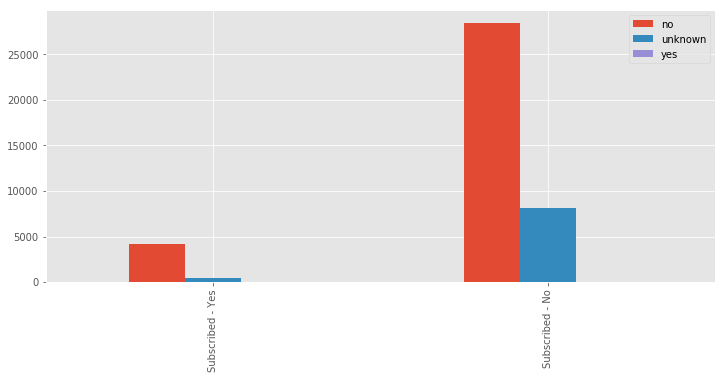

In [416]:
# Defaulters and Subscriptions
subscribed_default = data[data['y']==1]['default'].value_counts()
not_subscribed_default = data[data['y']==0]['default'].value_counts()
df = pd.DataFrame([subscribed_default,not_subscribed_default])
df.index = ['Subscribed - Yes','Subscribed - No']
df.plot(kind='bar', figsize=(12,5))

##### Defaulters are not targetted for purchase.

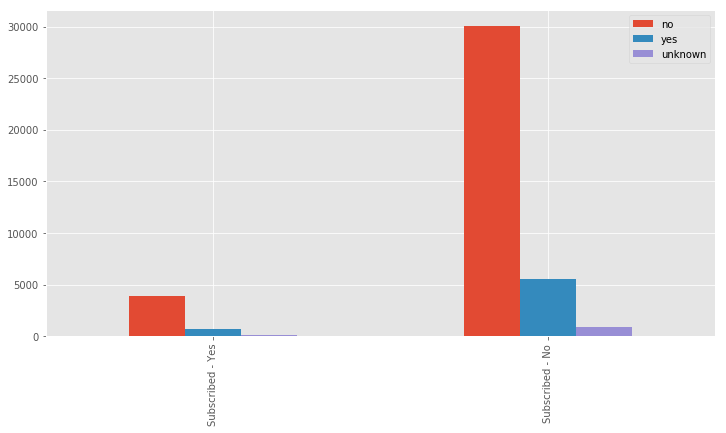

In [415]:
# Loans and Subscriptions
subscribed_loan = data[data['y']==1]['loan'].value_counts()
not_subscribed_loan = data[data['y']==0]['loan'].value_counts()
df = pd.DataFrame([subscribed_loan,not_subscribed_loan])
df.index = ['Subscribed - Yes','Subscribed - No']
df.plot(kind='bar', figsize=(12,6))

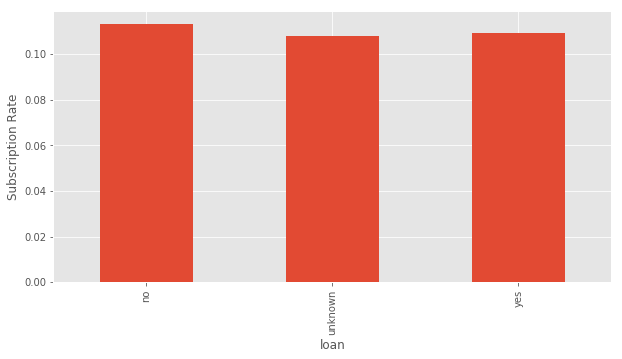

In [743]:
# Loans and Subscription rate
ax = plt.subplot()
ax.set_ylabel('Subscription Rate')
data.groupby('loan').mean()['y'].plot(kind='bar',figsize=(10,5), ax = ax)

##### Having loans does not have any significant impact on CD purchase decisions.

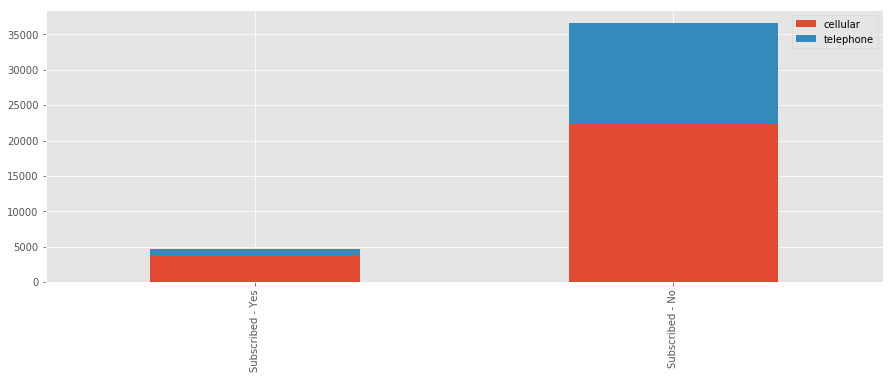

In [744]:
# Contacts and Subscriptions
subscribed_contact = data[data['y']==1]['contact'].value_counts()
not_subscribed_contact = data[data['y']==0]['contact'].value_counts()
df = pd.DataFrame([subscribed_contact,not_subscribed_contact])
df.index = ['Subscribed - Yes','Subscribed - No']
df.plot(kind='bar',stacked=True, figsize=(15,5))

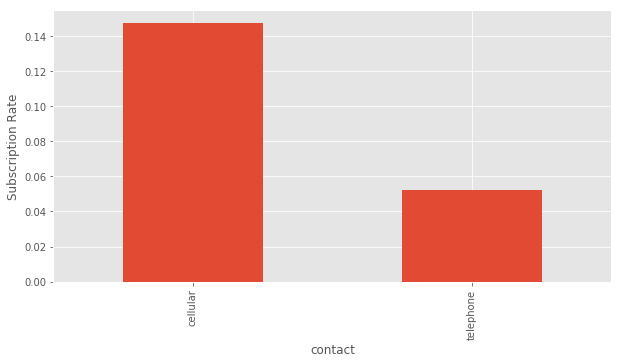

In [746]:
# Contact types
ax = plt.subplot()
ax.set_ylabel('Subscription Rate')
data.groupby('contact').mean()['y'].plot(kind='bar',figsize=(10,5), ax = ax)

##### Considerable number of people were contacted via both cells and telephones. Cellular contacts shows higher conversions. This might have happened because the cellular calls would have been received directly by the decision makers. 

##### Telephonic calls might have been received by answering machines or assistants/maids and not the decision makers. Hence, were not converted.

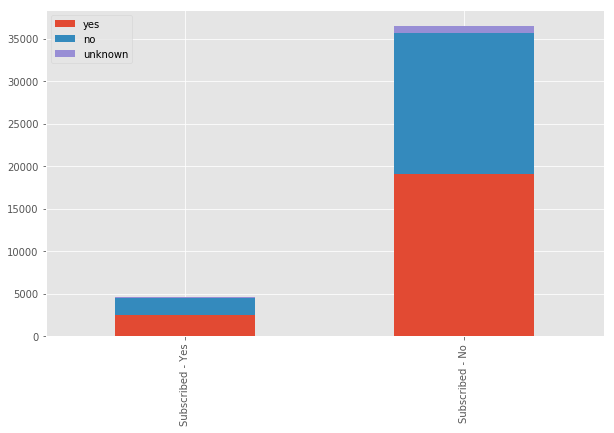

In [421]:
# Housing and Subscription
subscribed_housing = data[data['y']==1]['housing'].value_counts()
not_subscribed_housing = data[data['y']==0]['housing'].value_counts()
df = pd.DataFrame([subscribed_housing,not_subscribed_housing])
df.index = ['Subscribed - Yes','Subscribed - No']
df.plot(kind='bar',stacked=True, figsize=(10,6))

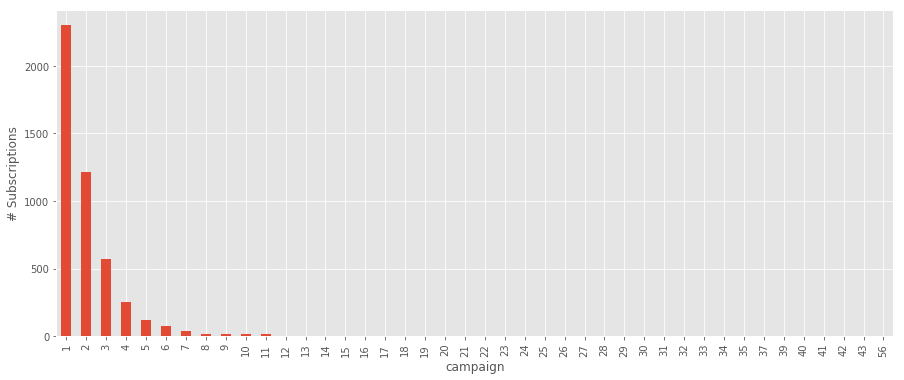

In [748]:
# Campaign and Subscriptions
ax = plt.subplot()
ax.set_ylabel('# Subscriptions')
data.groupby('campaign').sum()['y'].plot(kind='bar',figsize=(15,6), ax = ax)

##### Interested people usually make a purchase within the first three contacts.

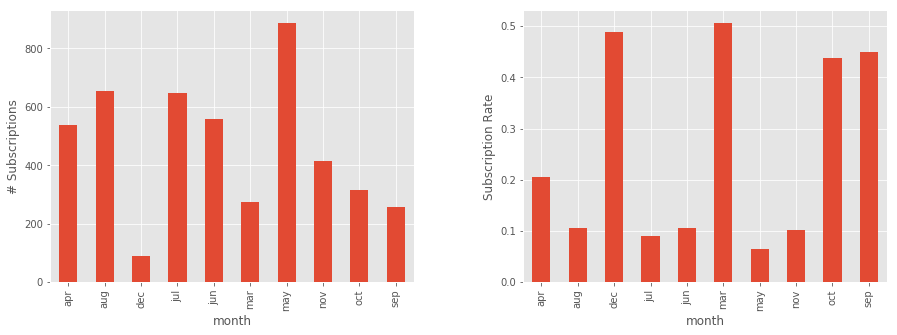

In [392]:
grid=plt.GridSpec(1,2,wspace=0.3)
fig=plt.figure(figsize=(6,5))

# Months and Subscriptions
ax = plt.subplot(grid[0,0])
ax.set_ylabel('# Subscriptions')
data.groupby('month').sum()['y'].plot(kind='bar',figsize=(15,5), ax = ax)

# Months and Subscription rate
ax = plt.subplot(grid[0,1])
ax.set_ylabel('Subscription Rate')
data.groupby('month').mean()['y'].plot(kind='bar',figsize=(15,5), ax = ax)

##### Less customers were contacted in December but most of them converted. Many customer were contacted in May but the conversion rate was low.

## Data Treatment

In [8]:
## Dummies for Categorical Variables

# Variables: job,martial,education, default, contact, housing, loan, poutcome
job_dummy=pd.get_dummies(data['job'],prefix='job_')
marital_dummy=pd.get_dummies(data['marital'])
edu_dummy=pd.get_dummies(data['education'])
default_dummy=pd.get_dummies(data['default'],prefix='default_')
contact_dummy=pd.get_dummies(data['contact'])
housing_dummy=pd.get_dummies(data['housing'],prefix='housing_')
loan_dummy=pd.get_dummies(data['loan'],prefix='loan_')
poutcome_dummy=pd.get_dummies(data['poutcome'],prefix='poutcome_')

# Removing base variables to avoid perfect collinearity and creating dataset
treated=pd.concat([data[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']],
                contact_dummy[contact_dummy.columns[1:]], #base variable: cellular
                default_dummy[default_dummy.columns[1:]], #base variable: default_no
                edu_dummy[edu_dummy.columns[1:]], #base variable: basic.4y
                job_dummy[job_dummy.columns[1:]], #base variable: job_admin.
                marital_dummy[marital_dummy.columns[1:]], #base  variable: divorced
                housing_dummy[housing_dummy.columns[1:]], #base variable: housing_no
                loan_dummy[loan_dummy.columns[1:]], #base variable: loan_no
                poutcome_dummy[poutcome_dummy.columns[1:]]], #base variable: poutcome_failure
                axis=1)
treated.shape

(41188, 39)

In [9]:
# Scaling
standard_train=preprocessing.scale(treated)
standard_train

array([[ 1.53303429, -0.56592197,  0.1954139 , ..., -0.42287213,
         0.39770593, -0.1857    ],
       [ 1.62899323, -0.56592197,  0.1954139 , ..., -0.42287213,
         0.39770593, -0.1857    ],
       [-0.29018564, -0.56592197,  0.1954139 , ..., -0.42287213,
         0.39770593, -0.1857    ],
       ..., 
       [ 1.53303429, -0.20490853,  0.1954139 , ..., -0.42287213,
         0.39770593, -0.1857    ],
       [ 0.38152696, -0.56592197,  0.1954139 , ..., -0.42287213,
         0.39770593, -0.1857    ],
       [ 3.26029527,  0.15610492,  0.1954139 , ..., -0.42287213,
        -2.51442063, -0.1857    ]])

In [10]:
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(treated, data['y'], test_size=0.33, random_state=501)

## Identification of Important Variables / Feature Selection

### ANOVA F value

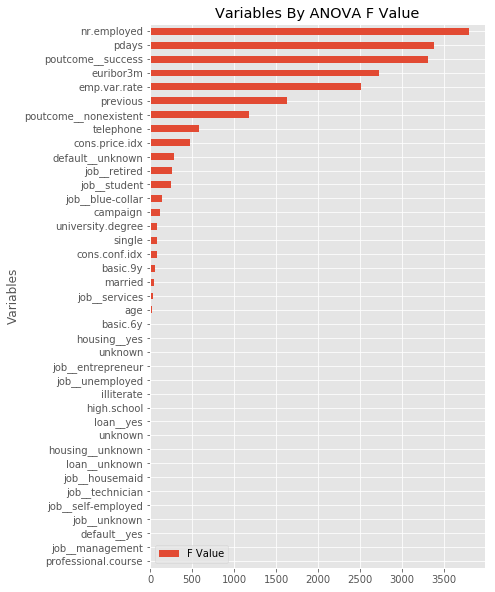

In [167]:
# Sorting Variables by ANOVA F Value
var_f=f_classif(x_train, y_train)
p=pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(var_f[0])],axis=1)
p.columns=['Variables','F Value']
p.sort_values(by=['F Value']).plot(x='Variables',y='F Value',kind='barh', figsize=(6,10),title='Variables By ANOVA F Value')

##### As per F values, the important factors affecting the CD purchase are: 
##### 1) Number of employees
##### 2) Days passed since last contact
##### 3) Success of previous marketing campaign
##### 4) Euribor 3 month rate
##### 5) Employment variation rate

### Information Value / Mutual Information

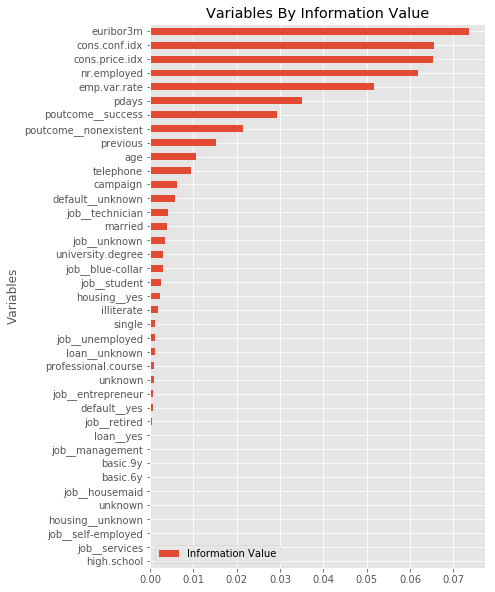

In [168]:
iv=mutual_info_classif(x_train, y_train)
p=pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(iv)],axis=1)
p.columns=['Variables','Information Value']
p.sort_values(by=['Information Value']).plot(x='Variables',y='Information Value',kind='barh', 
                                             figsize=(6,10),title='Variables By Information Value')

##### As per information values, the important factors affecting the CD purchase are: 
##### 1) Euribor 3 month rate
##### 2) Consumer Confidence Index
##### 3) Consumer Price Index
##### 4) Number of employees
##### 5) Employment variation rate
##### Success of previous campaign and days passed since last contact are also emphasized by the algorithm.

## Modeling

### Logistic Regression

In [969]:
## Logistic Regression 
glm=linear_model.LogisticRegression(C=3)
#glm.fit(train, data['y'])
glm.fit(x_train, y_train)
pred = glm.predict_proba(x_test) 
preds=pred[:,1]

# Assigning threshold
final_pred=[]
#len(preds[preds>0.20])
for i in range(len(preds)):
    if preds[i]>=0.14:
        final_pred.append(1)
    else:
        final_pred.append(0)

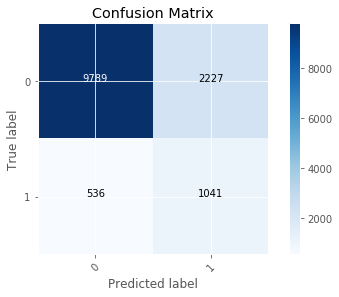

In [970]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,final_pred)
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=list([0,1]))

In [971]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(y_test, final_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
roc_auc

{0: 0.73738896119906083}

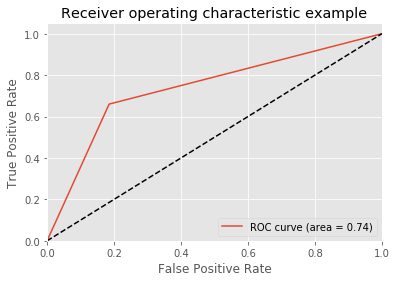

In [972]:
# Plotting the curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [973]:
accuracy_score(y_test,final_pred)

0.79673361288898703

### Gradient Boosting

In [105]:
# Gradient Boosting
params = {'n_estimators': 600, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbm = ensemble.GradientBoostingRegressor(**params)

In [106]:
gbm.fit(x_train, y_train)
mse = mean_squared_error(y_test, gbm.predict(x_test))
print("MSE: %.4f" % mse)

MSE: 0.0784


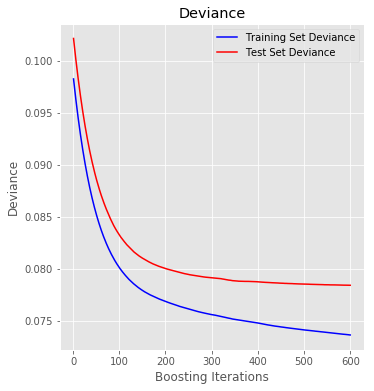

In [107]:
# Computing test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbm.staged_predict(x_test)):
    test_score[i] = gbm.loss_(y_test, y_pred)

# Plotting training deviance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbm.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [118]:
preds=gbm.predict(x_test)

# Assigning threshold
final_pred=[]
for i in range(len(preds)):
    if preds[i]>=0.10:
        final_pred.append(1)
    else:
        final_pred.append(0)

# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,final_pred)

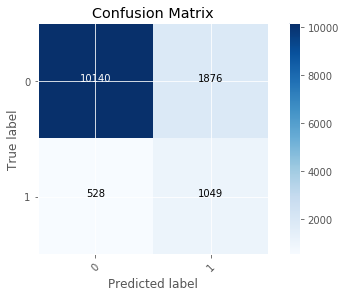

In [119]:
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=list([0,1]))

In [120]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(y_test, final_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
roc_auc

{0: 0.75453094880045801}

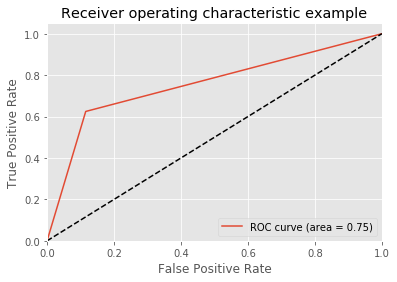

In [117]:
# Plotting the curve
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [954]:
accuracy_score(y_test,final_pred)

0.82314426543073638

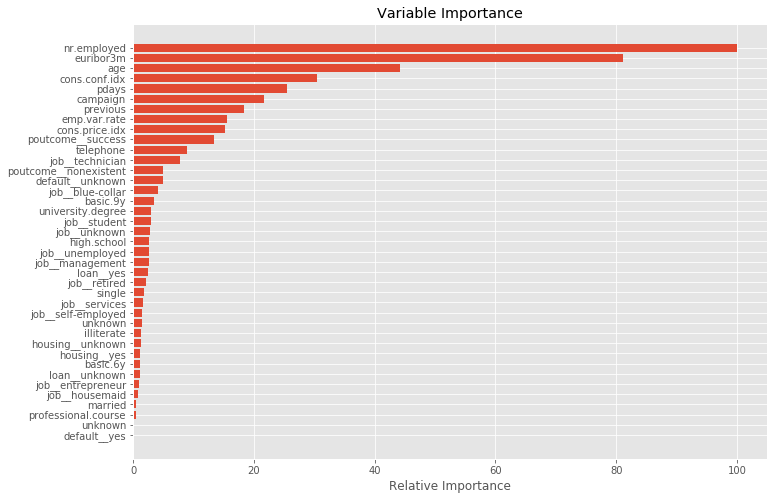

In [170]:
# Plot feature importance
plt.figure(figsize=(25, 8))
feature_importance = gbm.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

##### Gradient Boosting empasizes on number of employees,euribor 3 month rate, age, consumer confidence index and days passed since last contact as the key indicators affecting CD purchase.

## Decision Tree [Random Forest]

In [939]:
rdc = RandomForestClassifier(max_depth=10,random_state=0)
rdc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [940]:
preds=rdc.predict(x_test)

In [941]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,preds)

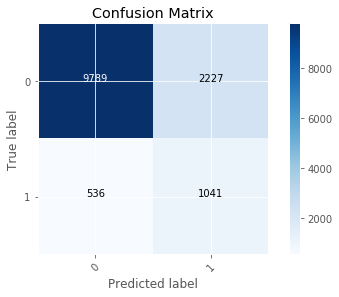

In [942]:
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=list([0,1]))

In [943]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(y_test, preds)
    roc_auc[i] = auc(fpr[i], tpr[i])
roc_auc

{0: 0.60312739851409281}

In [944]:
accuracy_score(y_test,preds)

0.89781505186493049

## Support Vector Machine

In [122]:
from sklearn.svm import SVC
scv_clf = SVC(probability=True)
scv_clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [123]:
pred=scv_clf.predict_proba(x_test)

In [124]:
preds=pred[:,1]

# Assigning threshold
final_pred=[]
for i in range(len(preds)):
    if preds[i]>=0.0875:
        final_pred.append(1)
    else:
        final_pred.append(0)

In [125]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,final_pred)

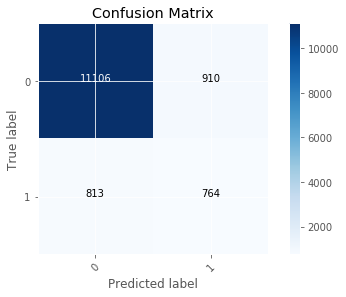

In [102]:
plt.figure()
plot_confusion_matrix(confusion_matrix, classes=list([0,1]))

In [126]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(y_test, final_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])
roc_auc

{0: 0.70439210940052865}

In [127]:
accuracy_score(y_test,final_pred)

0.86257632605017287

## Model Comparision

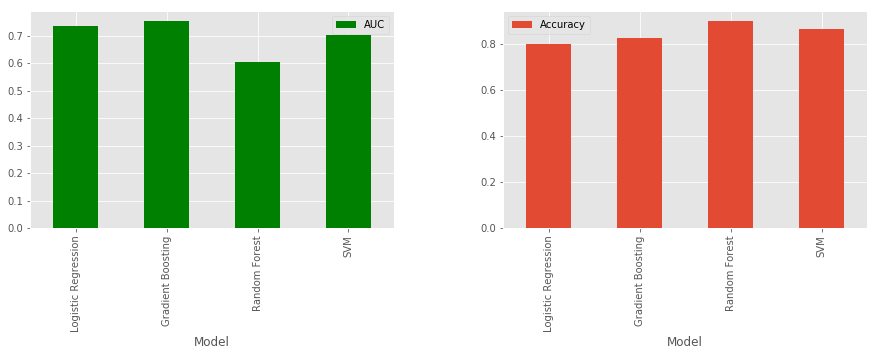

In [166]:
d={'Model':['Logistic Regression','Gradient Boosting','Random Forest','SVM'],'AUC':[0.737,0.754,0.603,0.704]
   ,'Accuracy':[0.797,0.823,0.898,0.863]}
d=pd.DataFrame(d)

grid=plt.GridSpec(1,2,wspace=0.3)
#fig=plt.figure(figsize=(6,5))
ax = plt.subplot(grid[0,0])
d.plot('Model','AUC',kind='bar',figsize=(15,4),ax=ax,color='green')
ax = plt.subplot(grid[0,1])
d.plot('Model','Accuracy',kind='bar',figsize=(15,4),ax=ax)


##### Though the accuracy of Random Forest is the highest, the best model is Gradient Boosting Regressor because of highest AUC.